In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('vgsales.csv')
data.dropna(inplace=True)
print(data)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

Index(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt'],
      dtype='object', name='Name')


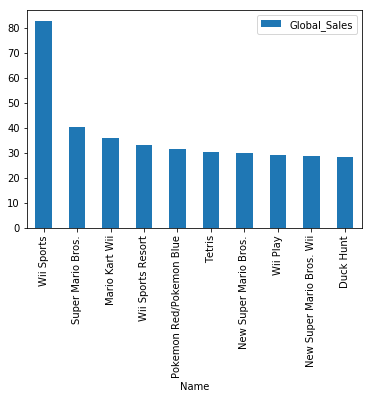

In [4]:
'''
task-1: 最受欢迎的游戏、类型、发行平台以及发行商
---------------------------------------------
先不考虑发行时间。
在这里认为全球销量最多的10款游戏为受欢迎的游戏
同时认为全球总销量上最多的10个游戏类型、平台以及发行商是受欢迎的
'''

''' 受欢迎的游戏 '''
popular_game = data[:10][['Name', 'Global_Sales']]
popular_game.set_index('Name', inplace=True)
print(popular_game.index)
popular_game.plot.bar()

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Puzzle'],
      dtype='object', name='Genre')
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC'], dtype='object', name='Platform')
Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games'],
      dtype='object', name='Publisher')


<Figure size 432x288 with 0 Axes>

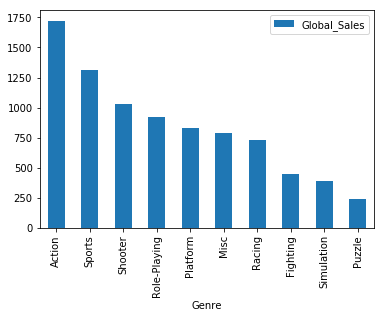

<Figure size 432x288 with 0 Axes>

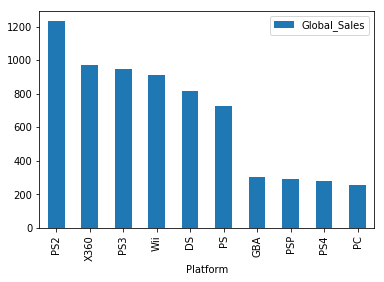

<Figure size 432x288 with 0 Axes>

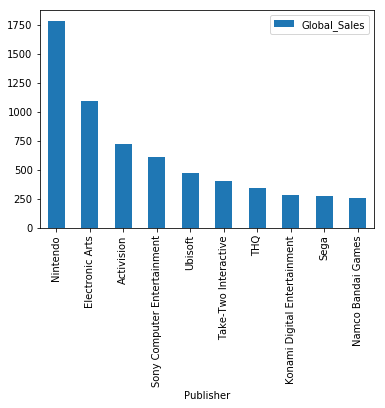

"\n据上分析可得，\n最受欢迎的10游戏分别是:\n'Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',\n'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',\n'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',\n'Duck Hunt'\n\n最受欢迎的10个游戏类型、平台、发行商分别是:\n\n类型:\n'Action', \n'Sports', \n'Shooter', \n'Role-Playing', \n'Platform', \n'Misc',\n'Racing', \n'Fighting', \n'Simulation', \n'Puzzle'\n\n平台:\n'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC'\n\n发行商:\n'Nintendo', \n'Electronic Arts', \n'Activision',\n'Sony Computer Entertainment', \n'Ubisoft', \n'Take-Two Interactive', \n'THQ',\n'Konami Digital Entertainment', \n'Sega', \n'Namco Bandai Games'\n"

In [6]:

''' 收欢迎的类型、平台以及发行商'''
k = 10
idx = ['Genre', 'Platform', 'Publisher']
for attr in idx:
    attr_data = data[[attr, 'Global_Sales']]
    attr_data.set_index(attr, inplace=True)
    attr_data_counts = attr_data.groupby(attr).sum()
    attr_data_counts.sort_values(by='Global_Sales', ascending=False, inplace=True)
    attr_data_counts = attr_data_counts[:k]
    print(attr_data_counts.index)
    plt.figure()
    attr_data_counts.plot.bar()
    plt.show()

'''
据上分析可得，
最受欢迎的10游戏分别是:
'Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
'Duck Hunt'

最受欢迎的10个游戏类型、平台、发行商分别是:

类型:
'Action', 
'Sports', 
'Shooter', 
'Role-Playing', 
'Platform', 
'Misc',
'Racing', 
'Fighting', 
'Simulation', 
'Puzzle'

平台:
'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC'

发行商:
'Nintendo', 
'Electronic Arts', 
'Activision',
'Sony Computer Entertainment', 
'Ubisoft', 
'Take-Two Interactive', 
'THQ',
'Konami Digital Entertainment', 
'Sega', 
'Namco Bandai Games'
'''

In [7]:
'''
task-2: 预测每年的游戏销售额
---------------------------------------------
我们推测，每年的游戏销售额应与以下几个因素相关:
(1). 不同发行商这一年发行的游戏数量
     市场对不同发行的偏爱程度不同。若市场偏爱发行商A的游戏，那么在一年内A发行的游戏越多，
     游戏销售额可能就越大。

(2). 这一年内发行的游戏种类
     同(1)，市场也可能更偏向于某一种游戏类型

(3). 这一年游戏平台的数量
     同(1)

因此 这里我们以年为单位，自变量为上述因素，因变量为全球销售额，做一个回归预测任务

'''

'\ntask-2: 预测每年的游戏销售额\n---------------------------------------------\n我们推测，每年的游戏销售额应与以下几个因素相关:\n(1). 不同发行商这一年发行的游戏数量\n     市场对不同发行的偏爱程度不同。若市场偏爱发行商A的游戏，那么在一年内A发行的游戏越多，\n     游戏销售额可能就越大。\n\n(2). 这一年内发行的游戏种类\n     同(1)，市场也可能更偏向于某一种游戏类型\n\n(3). 这一年游戏平台的数量\n     同(1)\n\n因此 这里我们以年为单位，自变量为上述因素，因变量为全球销售额，做一个回归预测任务\n\n'

In [8]:
'''
经过计算发现,销量前20的游戏平台、发行商占总销量的98.35% 与 85.72%
因此在考虑平台、发行商影响时，只考虑销量前20的的平台与发行商
游戏类型有12个，因此每一年的输入向量是一个(12 + 20 + 20) = 52维的向量
也就是说,输入向量的1~12表示12个发行商在这一年发行的游戏数量
13~32, 33~52分别表示20种类型、20个平台在这一年的游戏数量
同时发现最后两年的销售额异常小，因此舍去
'''

'\n经过计算发现,销量前20的游戏平台、发行商占总销量的98.35% 与 85.72%\n因此在考虑平台、发行商影响时，只考虑销量前20的的平台与发行商\n游戏类型有12个，因此每一年的输入向量是一个(12 + 20 + 20) = 52维的向量\n也就是说,输入向量的1~12表示12个发行商在这一年发行的游戏数量\n13~32, 33~52分别表示20种类型、20个平台在这一年的游戏数量\n同时发现最后两年的销售额异常小，因此舍去\n'

In [9]:
total_years = list(set(data['Year']))
total_years = total_years[:-2]
print(total_years)
len_years = len(total_years)
# x = np.zeros((len_years, 52))
# print(x.shape)

y = []
for year in total_years:
    year_idx = data['Year'] == year
    year_sales = data['Global_Sales'][year_idx].sum()
    y.append(year_sales)
print(y)
print(len(y))


[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]
[11.38, 35.769999999999996, 28.860000000000003, 16.790000000000003, 50.36, 53.940000000000005, 37.06999999999999, 21.740000000000002, 47.22, 73.45000000000002, 49.39, 32.23, 76.16000000000003, 45.97999999999999, 79.17, 88.10999999999999, 199.14999999999998, 200.98, 256.47, 251.26999999999998, 201.56, 331.47, 395.52000000000004, 357.84999999999997, 414.01, 458.5100000000001, 521.04, 609.92, 678.8999999999999, 667.3, 600.29, 515.8, 363.48999999999995, 368.11, 337.03, 264.44, 70.89999999999999]
37


In [10]:
'''
确定输入向量位置含义
'''
top_k = 20
idx = ['Genre', 'Platform', 'Publisher']
step = 0
vec_dict = {}
for attr in idx:
    attr_data = data[[attr, 'Global_Sales']]
    attr_data.set_index(attr, inplace=True)
    attr_data_counts = attr_data.groupby(attr).sum()
    attr_data_counts.sort_values(by='Global_Sales', ascending=False, inplace=True)
    attr_data_counts = attr_data_counts[:top_k]
    
    for item in attr_data_counts.index:
        vec_dict[item] = step
        step += 1
print(vec_dict)
        


{'Action': 0, 'Sports': 1, 'Shooter': 2, 'Role-Playing': 3, 'Platform': 4, 'Misc': 5, 'Racing': 6, 'Fighting': 7, 'Simulation': 8, 'Puzzle': 9, 'Adventure': 10, 'Strategy': 11, 'PS2': 12, 'X360': 13, 'PS3': 14, 'Wii': 15, 'DS': 16, 'PS': 17, 'GBA': 18, 'PSP': 19, 'PS4': 20, 'PC': 21, 'GB': 22, 'XB': 23, 'NES': 24, '3DS': 25, 'N64': 26, 'SNES': 27, 'GC': 28, 'XOne': 29, '2600': 30, 'WiiU': 31, 'Nintendo': 32, 'Electronic Arts': 33, 'Activision': 34, 'Sony Computer Entertainment': 35, 'Ubisoft': 36, 'Take-Two Interactive': 37, 'THQ': 38, 'Konami Digital Entertainment': 39, 'Sega': 40, 'Namco Bandai Games': 41, 'Microsoft Game Studios': 42, 'Capcom': 43, 'Atari': 44, 'Square Enix': 45, 'Warner Bros. Interactive Entertainment': 46, 'Disney Interactive Studios': 47, 'Eidos Interactive': 48, 'LucasArts': 49, 'Bethesda Softworks': 50, 'Midway Games': 51}


In [11]:
idx = ['Genre', 'Platform', 'Publisher']

attr_feat_dim = {
    'Genre': 12,
    'Platform': 20,
    'Publisher': 20
}
attr_feats = np.zeros((len_years, 52))

for attr in idx:
    attr_data = data[[attr, 'Year']]
    for k, year in enumerate(total_years):
        year_idx = attr_data['Year'] == year
        year_sales = attr_data[year_idx][[attr]]
        counts = pd.Series(np.squeeze(year_sales.values)).value_counts().to_frame()
        for item, count in counts.iterrows():
            if item in vec_dict.keys():
                pos = vec_dict[item]
                attr_feats[k][pos] = count.values[0]

print(attr_feats)
print(attr_feats.shape)


[[  1.   1.   2. ...   0.   0.   0.]
 [ 25.   4.  10. ...   0.   0.   0.]
 [ 18.   2.   5. ...   0.   0.   0.]
 ...
 [186.  55.  47. ...   0.  11.   0.]
 [255.  62.  34. ...   0.  11.   0.]
 [118.  38.  32. ...   0.   3.   0.]]
(37, 52)


In [12]:
'''
最简单的线性回归来做回归预测
采用5折交叉交叉验证，当预测任务完成后，将计算预测值与实际值的
pearson系数与rmse作为评价指标
pearson系数越接近1， rmse越小则预测效果越好
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
x = attr_feats
y = np.array(y)


[[0.00030769 0.00043403 0.00156006 ... 0.         0.         0.        ]
 [0.00769231 0.00173611 0.00780031 ... 0.         0.         0.        ]
 [0.00553846 0.00086806 0.00390016 ... 0.         0.         0.        ]
 ...
 [0.05723077 0.02387153 0.03666147 ... 0.         0.15942029 0.        ]
 [0.07846154 0.02690972 0.02652106 ... 0.         0.15942029 0.        ]
 [0.03630769 0.01649306 0.024961   ... 0.         0.04347826 0.        ]]
(37, 52)
(37,)
88.00415337839537
0.9304660367298697


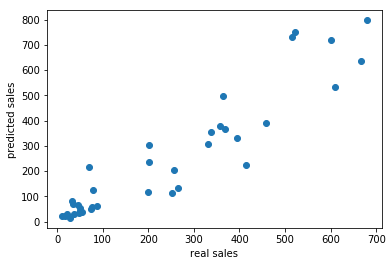

'\n结果显示模型的预测效果非常好\n也就表明了一开始定义的三个因素与年销售额非常相关\n'

In [14]:
from scipy.stats import pearsonr
# 做一个列平均
x = x  / np.sum(x, 0)
print(x)
print(x.shape)
print(y.shape)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
model = LinearRegression()

y_pred = np.zeros(y.shape)
for train, test in kf.split(x, y):
    model.fit(x[train], y[train])
    y_pred[test] = model.predict(x[test])

rmse = np.sqrt(np.sum((y_pred - y) ** 2) / y.shape[0])
print(rmse)
r = pearsonr(y, y_pred)[0]
print(r)
plt.scatter(y, y_pred)
plt.xlabel('real sales')
plt.ylabel('predicted sales')
plt.show()

'''
结果显示模型的预测效果非常好
也就表明了一开始定义的三个因素与年销售额非常相关
'''

In [15]:
'''
task-3: 可视化应用：如何完整清晰地展示这个销售故事
---------------------------------------------
前面的信息挖掘很少从时间角度进行分析
以下可视化任务均从时间角度观察这个销售故事
'''


'\ntask-3: 可视化应用：如何完整清晰地展示这个销售故事\n---------------------------------------------\n前面的信息挖掘很少从时间角度进行分析\n以下可视化任务均从时间角度观察这个销售故事\n'

In [16]:
'''
观察各地区与全球销售额与时间的变化情况
'''
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
year_sales_data = data[regions + ['Year']].copy()

print(regions)
regions_sales = np.zeros((5, len_years))

for k, year in enumerate(total_years):
    year_idx = year_sales_data['Year'] == year
    regions_year_sales = year_sales_data[regions][year_idx]
    regions_sales[:, k] = regions_year_sales.sum().values



['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [17]:
import seaborn as sns


'\n如图所示为5个地图销售额随时间的变化\n大致可以看出，other与JP在这37年销售额处于一个稳定状态\n另外两个地区的销售额在这37年里先处于一个上升阶段，大致在2018年处于最高峰，最后这两年又下降\n'

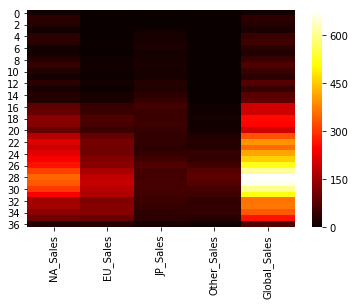

In [18]:
regions_sales_df = pd.DataFrame({
    'NA_Sales': regions_sales[0],
    'EU_Sales': regions_sales[1], 
    'JP_Sales': regions_sales[2], 
    'Other_Sales': regions_sales[3], 
    'Global_Sales': regions_sales[4]
})
sns.heatmap(regions_sales_df, cmap='hot') 

'''
如图所示为5个地图销售额随时间的变化
大致可以看出，other与JP在这37年销售额处于一个稳定状态
另外两个地区的销售额在这37年里先处于一个上升阶段，大致在2018年处于最高峰，最后这两年又下降
'''

In [19]:
'''
观察销售量最大的发行商在这37年里
在各个地区的销售额变化
'''
publisher = 'Nintendo'
pub_year_sales_data = data[regions + ['Year', 'Publisher']].copy()
idx = pub_year_sales_data['Publisher']  == publisher
Ni_year_sales = pub_year_sales_data[regions + ['Year']][idx]

print(Ni_year_sales)
Ni_sales = np.zeros((5, len_years))
for k, year in enumerate(total_years):
    year_idx = Ni_year_sales['Year'] == year
    Ni_sales[:, k] = Ni_year_sales[regions][year_idx].sum().values
print(Ni_sales)


       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales    Year
0         41.49     29.02      3.77         8.46         82.74  2006.0
1         29.08      3.58      6.81         0.77         40.24  1985.0
2         15.85     12.88      3.79         3.31         35.82  2008.0
3         15.75     11.01      3.28         2.96         33.00  2009.0
4         11.27      8.89     10.22         1.00         31.37  1996.0
...         ...       ...       ...          ...           ...     ...
16269      0.00      0.00      0.01         0.00          0.01  2007.0
16357      0.00      0.00      0.01         0.00          0.01  2015.0
16456      0.00      0.00      0.01         0.00          0.01  2015.0
16473      0.00      0.00      0.01         0.00          0.01  2008.0
16542      0.00      0.00      0.01         0.00          0.01  2015.0

[696 rows x 6 columns]
[[0.0000e+00 0.0000e+00 0.0000e+00 2.3200e+00 3.2570e+01 3.2480e+01
  6.7300e+00 5.1300e+00 2.1230e+01 3.9810e+01 1.9750e+01

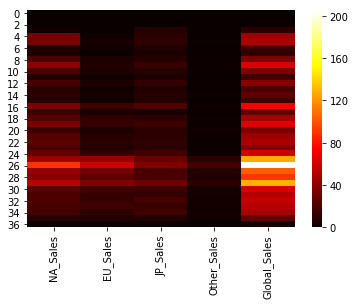

In [20]:
regions_sales_df = pd.DataFrame({
    'NA_Sales': Ni_sales[0],
    'EU_Sales': Ni_sales[1], 
    'JP_Sales': Ni_sales[2], 
    'Other_Sales': Ni_sales[3], 
    'Global_Sales': Ni_sales[4]
})
sns.heatmap(regions_sales_df, cmap='hot') 


In [ ]:
'''
可以看出Nintendo发行商在各地区基本处于一个大小年状态
前一年销量高，后一年销量则会低
其主力销售地区在NA与EU， other销量较少
'''